<a href="https://colab.research.google.com/github/andreidore/machine_learning/blob/main/pytorch/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
import torchvision

from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:

data_transform=transforms.ToTensor()


train_data=FashionMNIST(root="./data",train=True, download=True,transform=data_transform)
test_data=FashionMNIST(root="./data",train=True, download=False,transform=data_transform)

print("Train ",len(train_data))
print("Test ",len(train_data))

Train  60000
Test  60000


In [5]:
batch_size=20

train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_data,batch_size=batch_size,shuffle=True)

classes=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(20, 1, 28, 28)


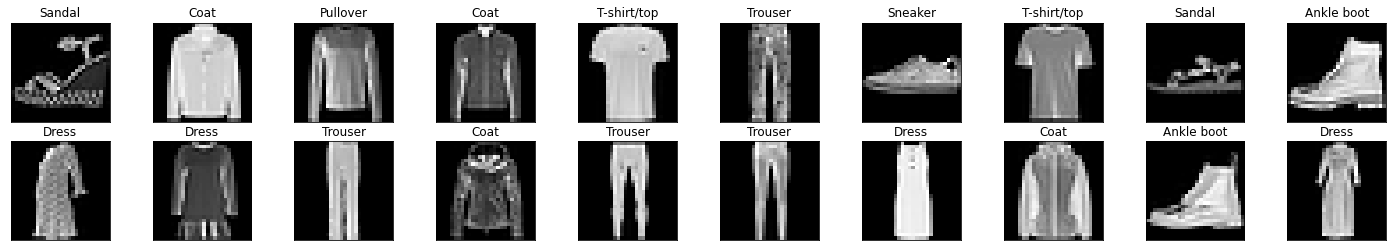

In [10]:
data_iter=iter(train_loader)

images,labels=data_iter.next()

images=images.numpy()

print(images.shape)

fig=plt.figure(figsize=(25,4))
for idx in np.arange(batch_size):
  ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(classes[labels[idx]])

In [12]:


import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()

    self.conv1=nn.Conv2d(1,10,3)

    self.pool=nn.MaxPool2d(2,2)

    self.conv2=nn.Conv2d(10,20,3)

    self.fc1=nn.Linear(20*5*5,10)


  def forward(self,x):

    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))

    x = x.view(x.size(0),-1)

    x=F.relu(self.fc1(x))
    x=F.log_softmax(x,dim=1)

    return x


net=Net()
net






Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=500, out_features=10, bias=True)
)

In [15]:
criterion=nn.NLLLoss()
optimizer=optim.SGD(net.parameters(),lr=0.0001)